## Import python libraries

In [104]:
# Import libraries
import numpy as np  # numerical computations, especially arrays and matrices
import pandas as pd  # data manipulation and analysis using DataFrames
import matplotlib.pyplot as plt  # data visualization (basic plotting)
%matplotlib inline  
# enables inline plotting in Jupyter notebooks
import seaborn as sns  # advanced statistical data visualization

## Explore source files

In [105]:
df_bookings = pd.read_csv("fact_bookings.csv", encoding= 'unicode_escape') # loading CSV with special character handling

In [106]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558.0,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558.0,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558.0,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100


In [107]:
df_bookings.shape

(134590, 12)

In [108]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134585.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.169335,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.037753,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [109]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [110]:
#unique room catagory
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [111]:
df_date = pd.read_csv('dim_date.csv', encoding= 'unicode_escape')
df_hotels = pd.read_csv('dim_hotels.csv', encoding= 'unicode_escape')
df_rooms = pd.read_csv('dim_rooms.csv', encoding= 'unicode_escape')
df_agg_bookings = pd.read_csv('fact_aggregated_bookings.csv', encoding= 'unicode_escape')

In [112]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [113]:
df_agg_bookings.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,empty_room
0,16559,1-May-22,RT1,25,30.0,NaN
1,19562,1-May-22,RT1,28,30.0,NaN


In [114]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [115]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


Exercise-1. Find out unique property ids in aggregate bookings dataset

In [116]:
df_bookings.property_id.unique()

array([16558.,    nan, 16559., 16560., 16561., 16562., 16563., 17558.,
       17559., 17560., 17561., 17562., 17563., 18558., 18559., 18560.,
       18561., 18562., 18563., 19558., 19559., 19560., 19561., 19562.,
       19563., 17564.])

Exercise-2. Find out total bookings per property_id

In [117]:
 df_agg_bookings.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,empty_room
0,16559,1-May-22,RT1,25,30.0,NaN
1,19562,1-May-22,RT1,28,30.0,NaN


In [118]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

Exercise-3. Find out days on which bookings are greater than capacity

In [119]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity,empty_room
3,17558,1-May-22,RT1,30,19.0,NaN
12,16563,1-May-22,RT1,100,41.0,NaN
4136,19558,11-Jun-22,RT2,50,39.0,NaN
6209,19560,2-Jul-22,RT1,123,26.0,NaN
8522,19559,25-Jul-22,RT1,35,24.0,NaN
9194,18563,31-Jul-22,RT4,20,18.0,NaN


Exercise-4. Find out properties that have highest capacity

In [120]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity,empty_room
27,17558,1-May-22,RT2,38,50.0,NaN
128,17558,2-May-22,RT2,27,50.0,NaN
229,17558,3-May-22,RT2,26,50.0,NaN
328,17558,4-May-22,RT2,27,50.0,NaN
428,17558,5-May-22,RT2,29,50.0,NaN
...,...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0,NaN
8828,17558,28-Jul-22,RT2,21,50.0,NaN
8928,17558,29-Jul-22,RT2,23,50.0,NaN
9028,17558,30-Jul-22,RT2,32,50.0,NaN


# 2. Data Cleaning

##### Checking the null values

In [206]:
df_bookings.isnull().sum()

booking_id               5
property_id              5
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [207]:
df_bookings = df_bookings.dropna(subset=['booking_id', 'property_id'])

In [208]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77903
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [209]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134585.000000,134582.000000,56682.000000,1.345850e+05,134585.000000
mean,18061.169335,2.036171,3.618980,1.537820e+04,12696.172077
std,1093.037753,1.034897,1.235006,9.303776e+04,6928.225999
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [210]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558.0,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558.0,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559.0,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561.0,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562.0,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562.0,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562.0,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560.0,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564.0,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [211]:
df_bookings.shape

(134585, 12)

In [212]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [213]:
df_bookings.shape

(134573, 12)

##### Drop unrelated/blank columns

In [214]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,empty_room
0,16559,1-May-22,RT1,25,30.0,NaN
1,19562,1-May-22,RT1,28,30.0,NaN
2,19563,1-May-22,RT1,23,30.0,NaN
3,17558,1-May-22,RT1,30,19.0,NaN
4,16558,1-May-22,RT1,18,19.0,NaN


In [215]:
df_agg_bookings.isnull().sum()

property_id               0
check_in_date             0
room_category             0
successful_bookings       0
capacity                  2
empty_room             9200
dtype: int64

In [216]:
df_agg_bookings.shape

(9200, 6)

In [219]:
df_agg_bookings.drop(['empty_room'], axis=1, inplace=True)

In [220]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


# Remove outlier

In [221]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558.0,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558.0,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558.0,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558.0,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558.0,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [222]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [223]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [224]:
avg = df_bookings.revenue_generated.mean().round(2)
avg

np.float64(15378.19)

In [225]:
std = df_bookings.revenue_generated.std().round(2)
std

np.float64(93041.88)

In [227]:
higher_limit = avg + 3*std
higher_limit

np.float64(294503.83)

In [228]:
lower_limit = avg - 3*std
lower_limit

np.float64(-263747.45)

In [229]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558.0,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559.0,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562.0,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559.0,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562.0,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [230]:
df_bookings[df_bookings.revenue_generated<lower_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [231]:
df_bookings.shape

(134573, 12)

In [232]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]

In [233]:
df_bookings.shape

(134568, 12)

In [312]:
#Removing outlier from revenue_realized column

In [146]:
df_bookings.shape

In [147]:
df_bookings.revenue_realized.describe()

In [148]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

In [149]:
df_bookings[df_bookings.revenue_realized >= higher_limit]

In [150]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

In [151]:
higher_limit_rt4 = df_bookings[df_bookings.room_category=="RT4"].revenue_realized.mean() + 3*df_bookings[df_bookings.room_category=="RT4"].revenue_realized.std()
higher_limit_rt4

##### Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

# Data Transformation 

##### Change the data type

In [255]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [258]:
df_agg_bookings['check_in_date'] = pd.to_datetime(df_agg_bookings['check_in_date'], errors='coerce')

In [259]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9198 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 359.5+ KB


In [260]:
df_agg_bookings['successful_bookings'] = df_agg_bookings['successful_bookings'].astype('float64')

In [261]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   float64       
 4   capacity             9198 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 359.5+ KB


##### Create Occupancy Percentage Colum (occ_pct)

In [262]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25.0,30.0
1,19562,2022-05-01,RT1,28.0,30.0
2,19563,2022-05-01,RT1,23.0,30.0


In [263]:
new_col = df_agg_bookings.apply( lambda row: row['successful_bookings'] / row['capacity'], axis=1)

In [264]:
df_agg_bookings = df_agg_bookings.assign(occ_pct=new_col.values)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,2022-05-01,RT1,25.0,30.0,0.833333
1,19562,2022-05-01,RT1,28.0,30.0,0.933333
2,19563,2022-05-01,RT1,23.0,30.0,0.766667


In [265]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,2022-05-01,RT1,25.0,30.0,83.33
1,19562,2022-05-01,RT1,28.0,30.0,93.33
2,19563,2022-05-01,RT1,23.0,30.0,76.67


# Insight Generation 

##### 1. What is an average occupancy rate in each of the room categories?

In [266]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,2022-05-01,RT1,25.0,30.0,83.33
1,19562,2022-05-01,RT1,28.0,30.0,93.33
2,19563,2022-05-01,RT1,23.0,30.0,76.67
3,17558,2022-05-01,RT1,30.0,19.0,157.89
4,16558,2022-05-01,RT1,18.0,19.0,94.74


In [267]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    58.224247
RT2    58.040278
RT3    58.028213
RT4    59.300461
Name: occ_pct, dtype: float64

I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [268]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [270]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,2022-05-01,RT1,25.0,30.0,83.33,RT1,Standard
1,19562,2022-05-01,RT1,28.0,30.0,93.33,RT1,Standard
2,19563,2022-05-01,RT1,23.0,30.0,76.67,RT1,Standard


In [271]:
df.drop("room_id", axis=1, inplace=True)
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,2022-05-01,RT1,25.0,30.0,83.33,Standard
1,19562,2022-05-01,RT1,28.0,30.0,93.33,Standard
2,19563,2022-05-01,RT1,23.0,30.0,76.67,Standard


In [284]:
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

**2. Print average occupancy rate per city**

In [272]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [273]:
df = pd.merge(df, df_hotels, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,2022-05-01,RT1,25.0,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,2022-05-01,RT1,28.0,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,2022-05-01,RT1,23.0,30.0,76.67,Standard,Atliq Palace,Business,Bangalore


In [274]:
df.groupby("city")["occ_pct"].mean().round(2)

city
Bangalore    56.59
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Name: occ_pct, dtype: float64

**3. When was the occupancy better? Weekday or Weekend?**

In [275]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [276]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

ValueError: You are trying to merge on datetime64[ns] and object columns for key 'check_in_date'. If you wish to proceed you should use pd.concat

In [277]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [279]:
df_date['date'] = pd.to_datetime(df_date['date'], format='%Y-%m-%d', errors='coerce')

In [280]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25.0,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
1,19562,2022-05-01,RT1,28.0,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend
2,19563,2022-05-01,RT1,23.0,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,2022-05-01,May 22,W 19,weekend


In [283]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    51.82
weekend     74.24
Name: occ_pct, dtype: float64

##### 4. In the month of June, what is the occupancy for different cities

In [179]:
df.groupby("day_type")["occ_pct"].mean()

In [180]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(3)

In [181]:
df_june_22.groupby('city')['occ_pct'].mean().round(2)

# Visualization

#### #Plot the graph of booking count accross different platform

In [301]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558.0,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558.0,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558.0,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558.0,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558.0,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [302]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55058
makeyourtrip      26895
logtrip           14753
direct online     13374
tripster           9630
journey            8106
direct offline     6752
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

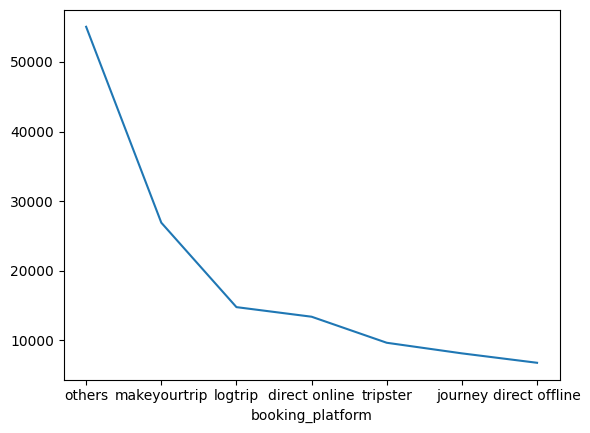

In [303]:
df_bookings.booking_platform.value_counts().plot()

<Axes: xlabel='booking_platform'>

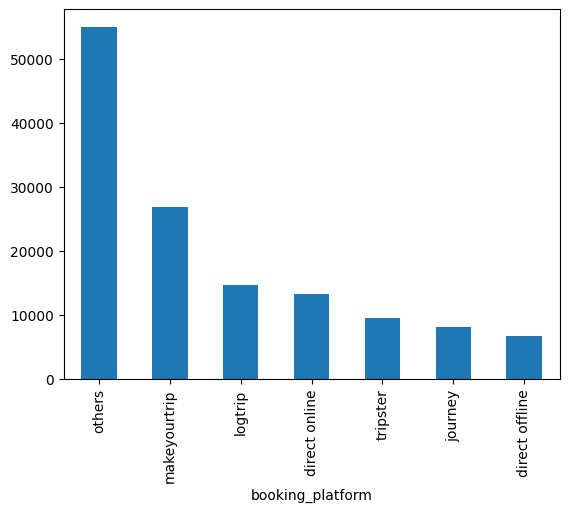

In [304]:
#bar plot
df_bookings.booking_platform.value_counts().plot(kind="bar")

#### #Compare the booking count based on different city and category

In [305]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25.0,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
1,19562,2022-05-01,RT1,28.0,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend
2,19563,2022-05-01,RT1,23.0,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,2022-05-01,May 22,W 19,weekend
3,17558,2022-05-01,RT1,30.0,19.0,157.89,Standard,Atliq Grands,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
4,16558,2022-05-01,RT1,18.0,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


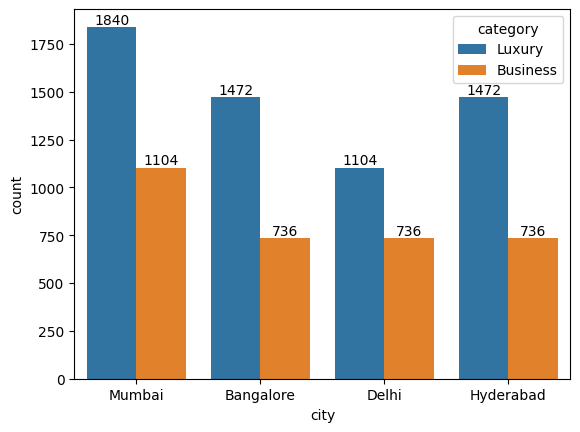

In [306]:
xy = sns.countplot(data = df, x = 'city', hue = 'category')

for bars in xy.containers:
    xy.bar_label(bars)

#### #Show the co-relation of different parameters with heatmap

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   float64       
 4   capacity             9198 non-null   float64       
 5   occ_pct              9198 non-null   float64       
 6   room_class           9200 non-null   object        
 7   property_name        9200 non-null   object        
 8   category             9200 non-null   object        
 9   city                 9200 non-null   object        
 10  date                 9200 non-null   datetime64[ns]
 11  mmm yy               9200 non-null   object        
 12  week no              9200 non-null   object        
 13  day_type             9200 non-nul

In [308]:
# #co-relation among numeric columns
df_num = df.select_dtypes(include=['number'])

In [309]:
df_num.head()

,property_id,successful_bookings,capacity,occ_pct
0,16559,25.0,30.0,83.33
1,19562,28.0,30.0,93.33
2,19563,23.0,30.0,76.67
3,17558,30.0,19.0,157.89
4,16558,18.0,19.0,94.74


In [310]:
df_num.corr()

,property_id,successful_bookings,capacity,occ_pct
property_id,1.000000,0.036922,0.104616,-0.105943
successful_bookings,0.036922,1.000000,0.826427,0.463210
capacity,0.104616,0.826427,1.000000,-0.058833
occ_pct,-0.105943,0.463210,-0.058833,1.000000


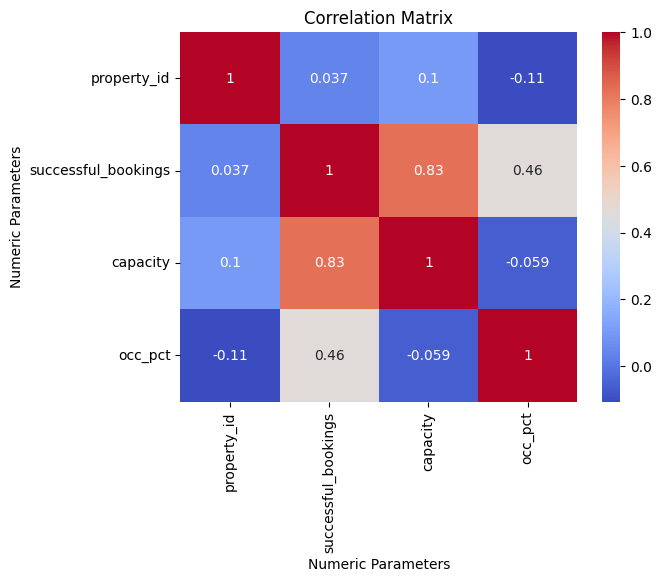

In [311]:
correlation_matrix = df_num.corr()  # Compute pairwise correlation between numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # annot=True shows correlation values in cells
plt.title('Correlation Matrix')  # Add a title
plt.xlabel('Numeric Parameters')  # X-axis label
plt.ylabel('Numeric Parameters')  # Y-axis label
plt.show()  # Display the plot

## Additional Exercises

**5: We got new data for the month of august. Append that to existing data**

In [189]:
df_august = pd.read_csv("new_data_august.csv")
df_august.head(3)

In [190]:
df_august.columns

In [191]:
df.columns

In [192]:
df_august.shape

In [193]:
df.shape

In [194]:
latest_df = pd.concat([df, df_august], ignore_index=True, axis=0)
latest_df.head()

**6. Print revenue realized per city**

In [195]:
df_bookings.head(3)

In [196]:
df_hotels.head(3)

In [197]:
df_all_bookings = pd.merge(df_bookings, df_hotels, on="property_id")
df_all_bookings.head(3)

In [198]:
df_all_bookings.groupby("city")["revenue_realized"].sum()

**7. Print month by month revenue**

In [199]:
df_date.head(3)

In [200]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [201]:
df_all_bookings.tail()

NameError: name 'df_all_bookings' is not defined

In [ ]:
df_date.info()

In [ ]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head()

In [ ]:
df_all_bookings.info()

In [ ]:
df_all_bookings["check_in_date"] = pd.to_datetime(df_all_bookings["check_in_date"])
df_all_bookings.head(3)

In [ ]:
df_all_bookings["check_in_date"] = pd.to_datetime(df_all_bookings["check_in_date"], dayfirst=True, errors='coerce')
df_all_bookings.head(3)

In [ ]:
df_all_bookings = pd.merge(df_all_bookings, df_date, left_on="check_in_date", right_on="date")
df_all_bookings.head(3)

In [ ]:
df_all_bookings.groupby("mmm yy")["revenue_realized"].sum()

#### Exercise-1. Print revenue realized per hotel type

In [ ]:
df_all_bookings.property_name.unique()

In [ ]:
df_all_bookings.groupby("property_name")["revenue_realized"].sum().sort_values()

#### Exercise-2 Print average rating per city

In [ ]:
df_all_bookings.groupby("city")["ratings_given"].mean().round(2)

In [ ]:
df_all_bookings.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")